# Trained Model Demo

This notebook demonstrates how to use models trained via the `training/full_train.py` script.

## Purpose

After running the full training pipeline, your models will be saved to:
```
aegmm_nids(full_train)/AEGMM_hybrid_<timestamp>/
```

This notebook loads and evaluates those newly trained models.

## Usage

1. Ensure you have run `python training/full_train.py ...` first
2. Update the model path below to point to your trained model timestamp
3. Run this notebook to evaluate performance

**Note**: For the paper's pretrained baseline model, use `pretrained/test_pre_ae_gmm.ipynb` instead.

---

In [1]:
import sys
from pathlib import Path
base = Path.cwd().parent
sys.path.append(str(base))

In [3]:
from utils.prepro import load_and_clean
from utils.visual import plot_mae_distribution, plot_gmm_score_distribution
from utils.evaluation import evaluate_mae, evaluate_gmm
from inference.predict_n_explain import batch_predict, predict_and_visualize_single_flow
from inference.load_models_n_explainers import load_complete_package
from utils.ignore_non_critical_warnings import suppress_non_critical_warnings

suppress_non_critical_warnings()

c:\Users\PC\Documents\test_clone\ae_gmm_nids\ae_nids_test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = load_and_clean('data/raw/CSECICIDS2018_improved.csv')

Cleaning data...


In [ ]:
pkg=load_complete_package('aegmm_nids(full_train)/AEGMM_hybrid_20251205_173344')

Model package loaded.
AE SHAP explainer loaded.
GMM SHAP explainer loaded.


## Batch Prediction and Evaluation

In [4]:
results=batch_predict(pkg, df)

In [5]:
Y_true=df['Attack Type']
rep=evaluate_mae(actual_attack_type=Y_true, mae_scores=results['mae'], threshold_mae=pkg['models']['threshold_mae'])


Classification Report (AutoEncoder Model):
              precision    recall  f1-score   support

     Anomaly       0.98      0.99      0.98   3526874
      Normal       0.99      0.98      0.98   3527665

    accuracy                           0.98   7054539
   macro avg       0.98      0.98      0.98   7054539
weighted avg       0.98      0.98      0.98   7054539



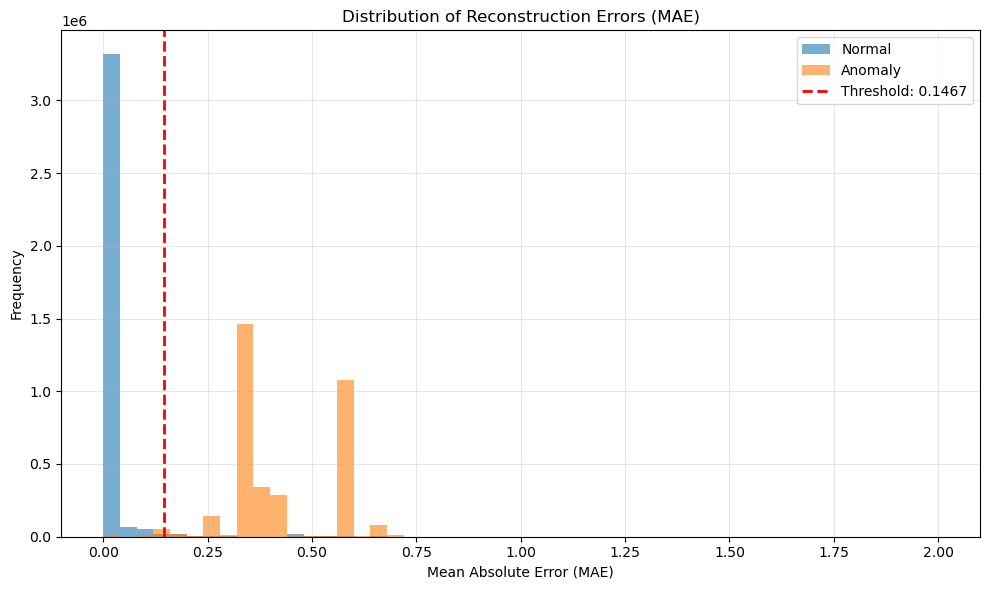

In [6]:
plot_mae_distribution(mae_errors=results['mae'], labels=Y_true, threshold_mae=pkg['models']['threshold_mae'], range_=(0,2))

In [ ]:
y_true_enc=pkg['models']['label_encoder'].transform(Y_true) # BENIGN=1, Attack=0

In [8]:
gmm_rep=evaluate_gmm(true_labels_binary=y_true_enc, y_pred_binary=results['anomaly'], class_names=pkg['models']['label_encoder'].classes_)


Classification Report (GMM Model):
              precision    recall  f1-score   support

     Anormal       0.99      0.98      0.98   3526874
      BENIGN       0.98      0.99      0.98   3527665

    accuracy                           0.98   7054539
   macro avg       0.98      0.98      0.98   7054539
weighted avg       0.98      0.98      0.98   7054539



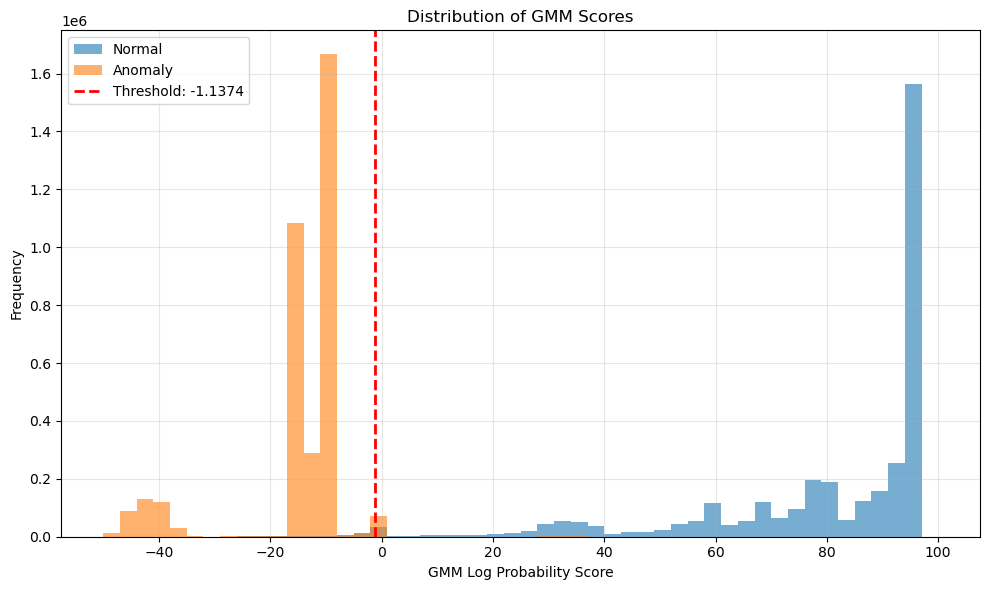

In [9]:
plot_gmm_score_distribution(gmm_scores=results['gmm_score'], labels=Y_true, threshold_gmm=pkg['models']['threshold_gmm'], bins=50, range_=(-50, 100))  

## Single Prediction and Explanation

In [4]:
test_sample = df.sample(n=1)  # pick a random sample from data each time code is run
actual_label = test_sample['Attack Type']
actual_label

2451561    Anormal
Name: Attack Type, dtype: object

AE-GMM PREDICTION & EXPLANATION 
Final Stage Threshold (GMM Threshold) is -1.137358
Actual Label: Anormal
Stage 1 (AE MAE) Score: 0.362829
Stage 2 (GMM Score) Score: -11.414951
Final Classification: ANOMALY
=== SHAP Explanation Results ===
======== GMM Score SHAP Explanation: =========


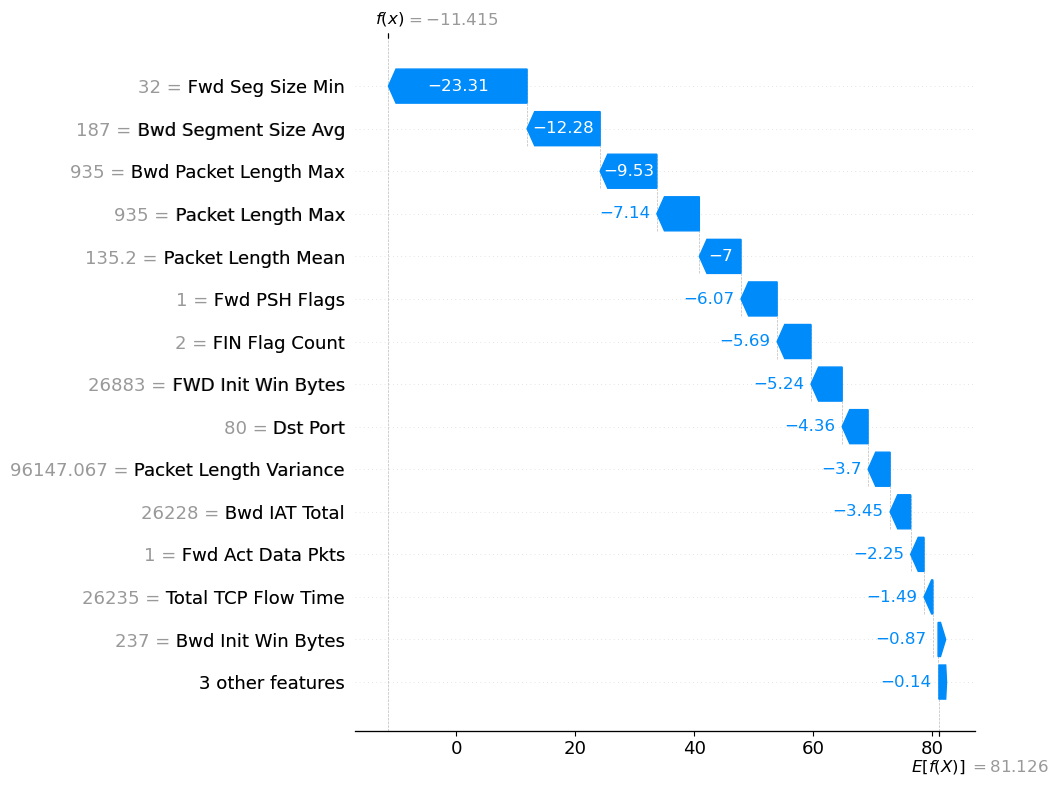

In [ ]:
predict_and_visualize_single_flow(pkg, test_sample, actual_label.values[0])